$y_i = 10 + 2 x_i + e_i, e_i = x_i*u_i, u_i \sim N(0,1)$

In [1]:
x <- seq(5,54)
e <- x*rnorm(length(x), 0, 1)
y <- 10 + 2*x+e

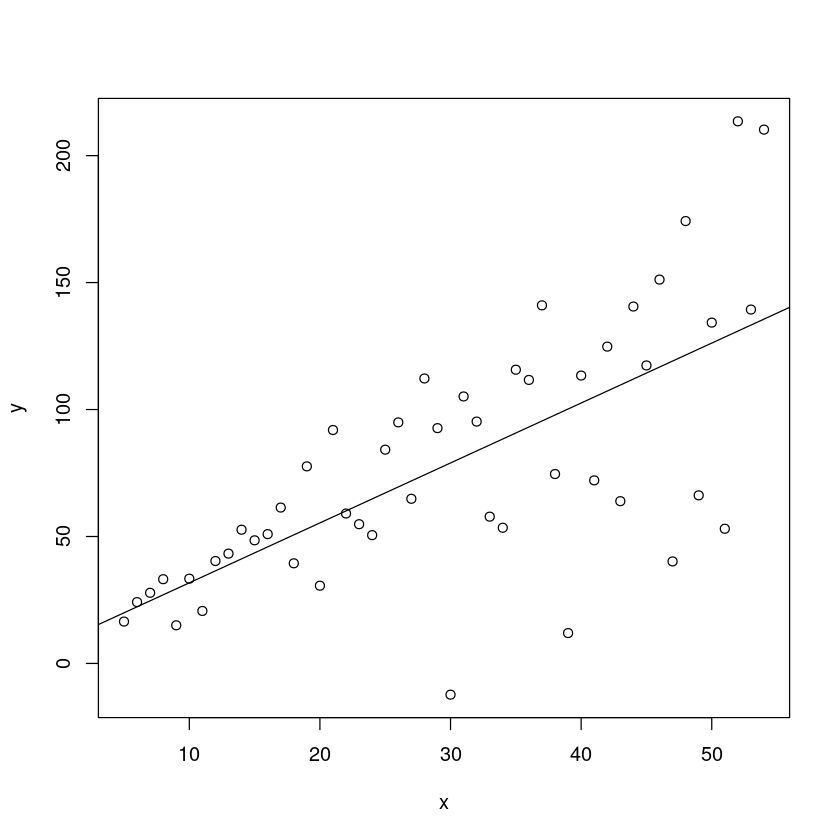

In [8]:
plot(x,y)
abline(lm(y~x))

In [9]:
m1 <- summary(lm(y~x))
m1

m2 <- summary(lm(y~x, weights=1/x))
m2


Call:
lm(formula = y ~ x)

Residuals:
    Min      1Q  Median      3Q     Max 
-91.271 -14.067   4.681  18.268  82.605 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   8.1390    11.8304   0.688    0.495    
x             2.3609     0.3602   6.554 3.56e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 36.76 on 48 degrees of freedom
Multiple R-squared:  0.4722,	Adjusted R-squared:  0.4613 
F-statistic: 42.95 on 1 and 48 DF,  p-value: 3.557e-08



Call:
lm(formula = y ~ x, weights = 1/x)

Weighted Residuals:
    Min      1Q  Median      3Q     Max 
-16.662  -3.540   1.056   3.317  11.530 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   8.8451     6.6704   1.326    0.191    
x             2.3370     0.2742   8.523  3.6e-11 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.956 on 48 degrees of freedom
Multiple R-squared:  0.6022,	Adjusted R-squared:  0.5939 
F-statistic: 72.65 on 1 and 48 DF,  p-value: 3.605e-11


In [12]:
m1$coefficients[2,1]
m1$coefficients[2,2]

[1] 2.360899

[1] 0.3602379

In [ ]:
x <- seq(5,54)

bh1 <- bh2 <- se1 <- se2  <- se3 <- c()

for (i in 1:5000){
    e <- x*rnorm(length(x), 0, 1)
    y <- 10 + 2*x+e
    
    m1 <- summary(lm(y~x))
    
    m2 <- summary(lm(y~x, weights=1/x))
    
    bh1 <- c(bh1, m1$coefficients[2,1])
    bh2 <- c(bh2, m2$coefficients[2,1])
    
    se1 <- c(se1, m1$coefficients[2,2])
    se2 <- c(se2, m2$coefficients[2,2])
    se3 <- c(se3, sqrt(vcovHC(lm(y~x),type = "HC3"))[2,2])

    
}

[1] 1.99931

[1] 1.999197

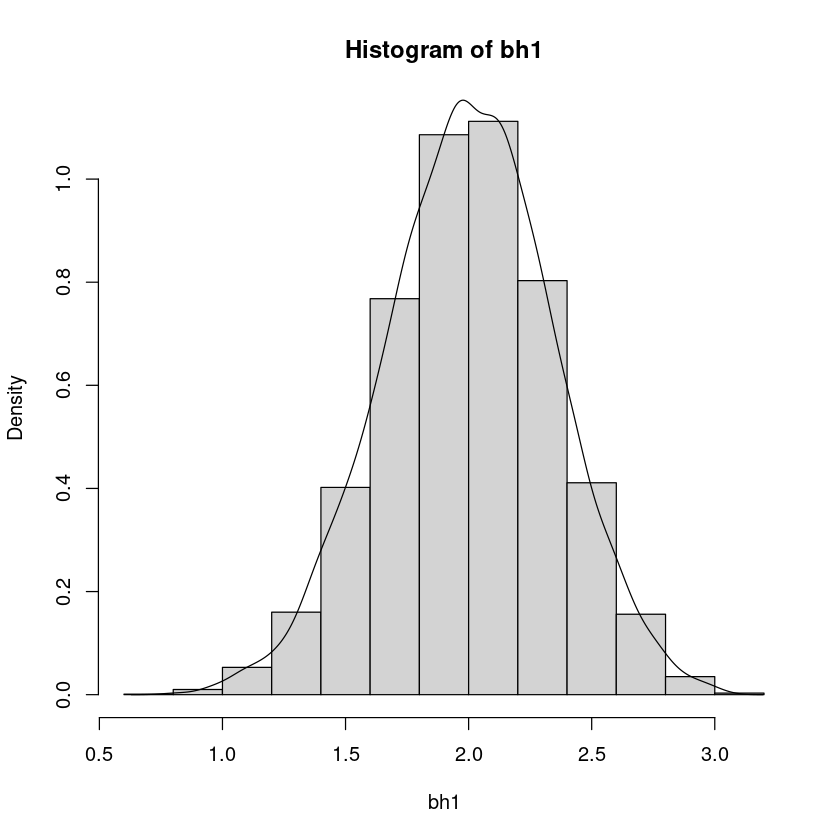

In [21]:
hist(bh1, prob=T)
lines(density(bh1))

mean(bh1)
mean(bh2)

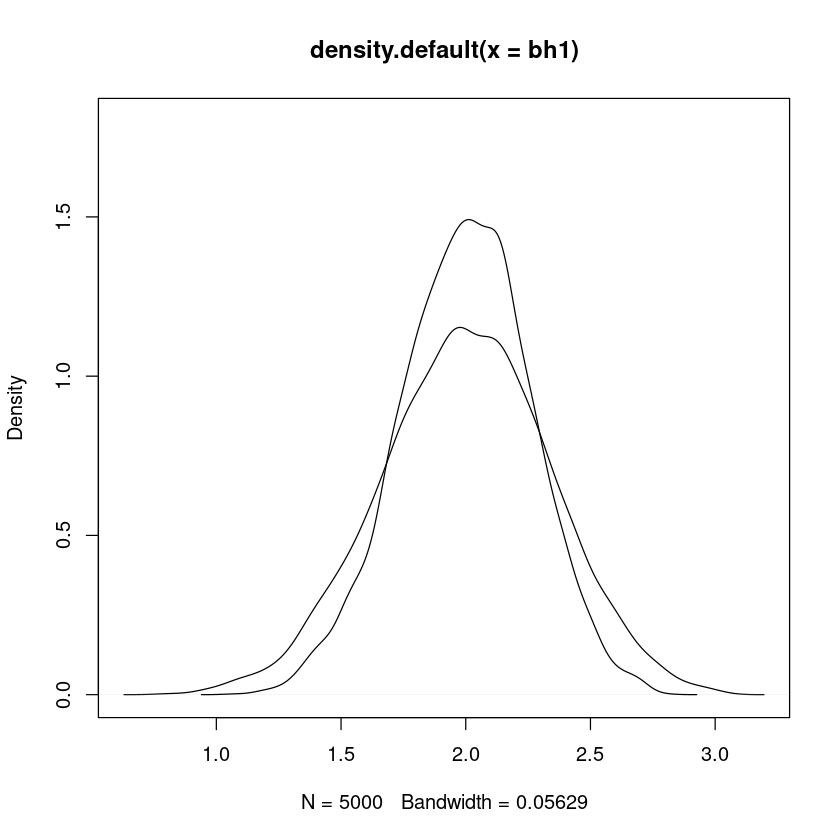

In [20]:
plot(density(bh1), ylim = c(0,1.8))
lines(density(bh2))

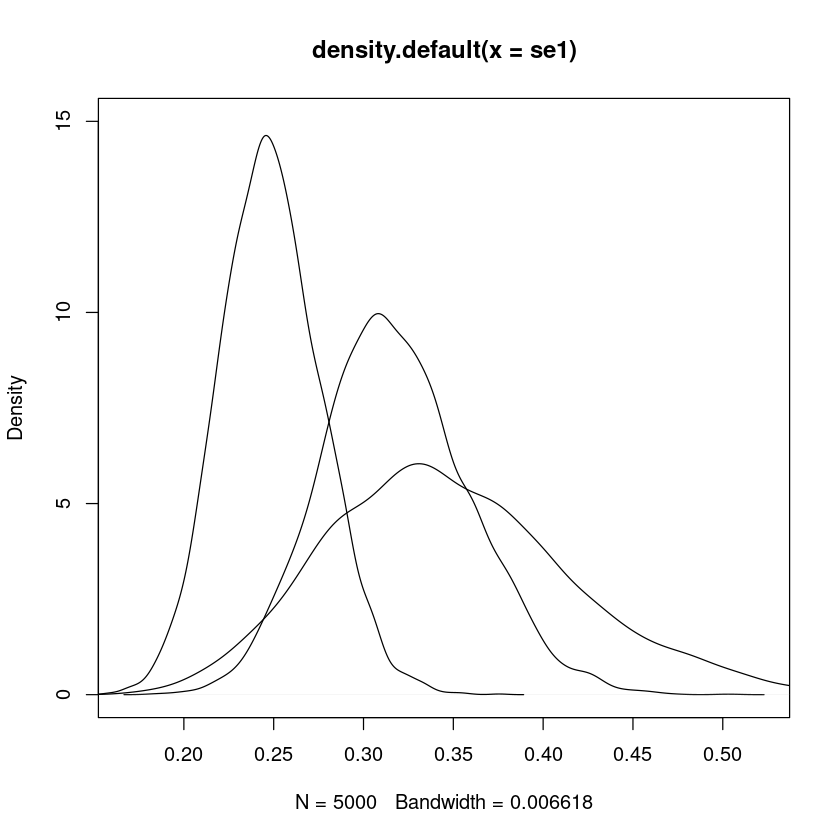

In [47]:
plot(density(se1), ylim = c(0,15))
lines(density(se2))
lines(density(se3))

In [30]:
install.packages("sandwich")

Installing package into ‘/home/xenakas/R/x86_64-pc-linux-gnu-library/4.0’
(as ‘lib’ is unspecified)



In [31]:
library("sandwich")

In [41]:
m1 <- lm(y~x)
sm <- summary(m1)

In [44]:
sm$coefficients
sqrt(vcovHC(m1,type = "HC0"))
sqrt(vcovHC(m1,type = "HC1"))
sqrt(vcovHC(m1,type = "HC2"))
sqrt(vcovHC(m1,type = "HC3"))

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),2.699491,9.6994608,0.2783135,7.819671e-01
x,2.310765,0.2953504,7.8238093,4.069148e-10


Warning message in sqrt(vcovHC(m1, type = "HC0")):
“NaNs produced”


,(Intercept),x
(Intercept),6.536351,NaN
x,NaN,0.3039781


Warning message in sqrt(vcovHC(m1, type = "HC1")):
“NaNs produced”


,(Intercept),x
(Intercept),6.671135,NaN
x,NaN,0.3102463


Warning message in sqrt(vcovHC(m1, type = "HC2")):
“NaNs produced”


,(Intercept),x
(Intercept),6.709154,NaN
x,NaN,0.3124026


Warning message in sqrt(vcovHC(m1, type = "HC3")):
“NaNs produced”


,(Intercept),x
(Intercept),6.887305,NaN
x,NaN,0.3210853
